Here is the list of feild we need to store for each post or blog

Tumblr_blog : blog_id (PK)Δ, blog_name, blog_url

Tumblr_blog_user : tumblr_blog_id (PFK)Δ, user_id

user: user_id (PK) Ζ, user_login, last_activity, user_url

Post: post_id (PK) Σ, platform_type_id (FK) Β, user_id (FK) Ζ, contents, created, url, twitter reply [PID/NULL] , twitter_retweet [PID/NULL], Twitter_quote [PID/NULL], tumblr_blog_id (FK) Δ, tumbler_reblog [PID/NULL], reddit_subreddit_name [varchar/NULL], reddit_reply [PID/NULL]

tag: tag_id (PK) Θ, platform_type_id (FK) Α, tag_name 

r_tag_post: tag_id (PFK) Θ, post_id (PFK) Σ

pltform_type: platform_type_id (PK) Α, platform_type_name


**PK: Primary Key, FK: Foreign key, 

In [ ]:
#ssh amh418@ssh.lehigh.edu
ssh -L 3306:127.0.0.1:3306 -N -f amh418@ssh.lehigh.edu   #lehigh user-pass

inserting platform

In [1]:
# import mysql.connector
# from sql_commands import insert_platform


# cnx = mysql.connector.connect(user='push', password='ElI)g!LDOBIwM)%*5o5{dbfz('
#                               ,host='127.0.0.1',database='edml')

# insert_platform(cnx,'','Tubmlr')

In [2]:
# # see the results of a table

# import mysql.connector

# cnx = mysql.connector.connect(user='push', password='ElI)g!LDOBIwM)%*5o5{dbfz('
#                               ,host='127.0.0.1',database='edml')

# cursor = cnx.cursor()

# cursor.execute("select * from platform_type")
 
# myresult = cursor.fetchall()
 
# for x in myresult:
#     print(x)

(4, 'Tubmlr')


reading posts and inserting into "edml" DB

In [4]:
import pytumblr
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import mysql.connector


#connection
cnx = mysql.connector.connect(user='push', password='ElI)g!LDOBIwM)%*5o5{dbfz('
                              ,host='127.0.0.1',database='edml')

client = pytumblr.TumblrRestClient(
  'yzIo8N2UuG5WvnaOghl8NgIHRdJdG0A75y3FY8yecfkllB4Vy4',
  'TV0DCkIxS8JhV9fNT4XQZn6G3sp3v1I0942qOeZICgL7nckKcq',
  's0ETGewoFwHkT3zWfRkRAIj5GHBibi5pLhsogNwaQKPH4xpMRK',
  'cf5NFXon2lfTLl5uVS2dSkcesK4ZxVcTl0nTJyPGWdQJvhRx1D'
)
ed_tags = [] # when you give an array of tags, posts which contain every single one of these tags would be returned
ed_tags.append("eatingdisorderrecovery")
ed_tags.append("ed_recovery")
ed_tags.append("ed")
ed_tags.append("eatingdisorder")
ed_tags.append("skinny")
ed_tags.append("anorexia")
ed_tags.append("bingeeatingdisorder")
blog_name = []
blog_name.append("imtrying-butimpissed.tumblr.com")
blog_name.append("anxiousgayyy.tumblr.com")


for x in tqdm(blog_name):
    a = client.posts(x, type = 'text') # returns number of text posts which contain all of the ed tags
    b = client.posts(x, type = 'video') # video
    c = client.posts(x, type = 'photo') # photo
    d = client.posts(x, type = 'quote') # quote
    e = client.posts(x) #total number of posts
    print('total posts = {0}, texts= {1} , videos = {2} , photos = {3}, quotes = {4} , pure texts = {5}%'.format(
                                e['total_posts'],a['total_posts'],b['total_posts'],c['total_posts'],d['total_posts'],
                                int(100*a['total_posts']/e['total_posts'])))

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.88s/it]

total posts = 1052, texts= 745 , videos = 6 , photos = 219, quotes = 17 , pure texts = 70%


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.47s/it]

total posts = 76, texts= 51 , videos = 0 , photos = 19, quotes = 3 , pure texts = 67%


Inserting blog-info into DB

In [9]:
cmd_str = ("INSERT INTO tumblr_blog"
               "(blog_name,blog_url) "
               "VALUES (%s,%s)")
cursor = cnx.cursor()


#iterating over blogs
for blog in blog_name:
    blog_info = client.blog_info(blog)
    res = cursor.execute(cmd_str, (blog_info['blog']['name'],blog_info['blog']['url'],))
    
    
cnx.commit()
cnx.close()

In [10]:
blog_info

{'blog': {'ask': True,
  'ask_anon': False,
  'ask_page_title': 'Ask me anything',
  'asks_allow_media': True,
  'avatar': [{'width': 512,
    'height': 512,
    'url': 'https://64.media.tumblr.com/ed16b1c8c36254232fac49cd98c3e26f/23af07bc90129f71-f1/s512x512u_c1/2d7ced2c7cb9038ebaa0bb05a87fde6bf41dff88.jpg'},
   {'width': 128,
    'height': 128,
    'url': 'https://64.media.tumblr.com/ed16b1c8c36254232fac49cd98c3e26f/23af07bc90129f71-f1/s128x128u_c1/bd6dd03459544aeea487258c1749a89f4ee24d0f.jpg'},
   {'width': 96,
    'height': 96,
    'url': 'https://64.media.tumblr.com/ed16b1c8c36254232fac49cd98c3e26f/23af07bc90129f71-f1/s96x96u_c1/ae418328d21d4874e3a95382278b1d881c184055.jpg'},
   {'width': 64,
    'height': 64,
    'url': 'https://64.media.tumblr.com/ed16b1c8c36254232fac49cd98c3e26f/23af07bc90129f71-f1/s64x64u_c1/bc0b69bd3f43f75997aa9a12071c192ebe3d4f0f.jpg'}],
  'can_chat': False,
  'can_send_fan_mail': False,
  'can_submit': True,
  'can_subscribe': False,
  'description': '',
  

inserting tumblr users [under process]

In [ ]:
# Tumblr_blog_user : tumblr_blog_id (PFK)Δ, user_id

inserting posts, tags, tag_post.

In [7]:
post

{'type': 'text',
 'blog_name': 'anxiousgayyy',
 'blog': {'name': 'anxiousgayyy',
  'title': 'Trying',
  'description': '',
  'url': 'https://anxiousgayyy.tumblr.com/',
  'uuid': 't:pUsnFS2Lwa9hw07yq8Uukw',
  'updated': 1655602068,
  'tumblrmart_accessories': {}},
 'id': 188573738063,
 'id_string': '188573738063',
 'post_url': 'https://anxiousgayyy.tumblr.com/post/188573738063',
 'slug': '',
 'date': '2019-10-25 01:57:38 GMT',
 'timestamp': 1571968658,
 'state': 'published',
 'format': 'html',
 'reblog_key': 'fgCXoitO',
 'tags': [],
 'short_url': 'https://tmblr.co/Z96vuV2ldtkHF',
 'summary': '',
 'should_open_in_legacy': False,
 'recommended_source': None,
 'recommended_color': None,
 'followed': False,
 'liked': False,
 'note_count': 10039,
 'title': None,
 'body': '<p><a href="https://more-naps-please.tumblr.com/post/181536078778" class="tumblr_blog">more-naps-please</a>:</p>\n\n<blockquote><figure class="tmblr-full" data-orig-height="525" data-orig-width="393"><img src="https://64.me

 50%|██████████████████████████████████████████                                          | 1/2 [00:14<00:14, 14.59s/it]

imtrying-butimpissed.tumblr.com
991


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:15<00:00,  7.89s/it]

anxiousgayyy.tumblr.com
76


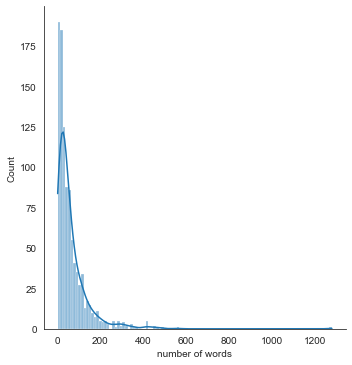

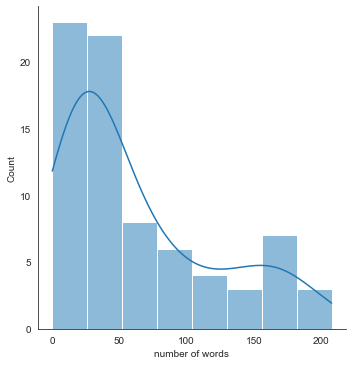

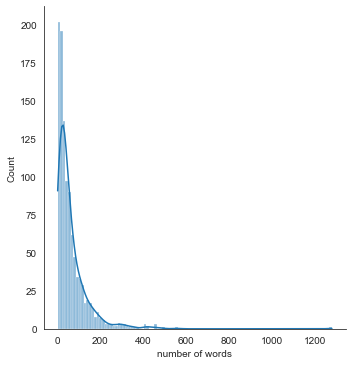

In [5]:
import pytumblr
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sys


# Post: post_id (PK) Σ, platform_type_id (FK) Β, user_id (FK) Ζ, contents, created, url, twitter reply [PID/NULL] , twitter_retweet [PID/NULL], Twitter_quote [PID/NULL], tumblr_blog_id (FK) Δ, tumbler_reblog [PID/NULL], reddit_subreddit_name [varchar/NULL], reddit_reply [PID/NULL]
# tag: tag_id (PK) Θ, platform_type_id (FK) Α, tag_name 
# r_tag_post: tag_id (PFK) Θ, post_id (PFK) Σ
# pltform_type: platform_type_id (PK) Α, platform_type_name


#connection
cnx = mysql.connector.connect(user='push', password='ElI)g!LDOBIwM)%*5o5{dbfz('
                              ,host='127.0.0.1',database='edml')

#command to insert post
cmd_post_str = ("INSERT INTO post"
               "(platform_type_id,user_id,contents,created,url,tumblr_blog_id,tumbler_reblog) "
               "VALUES (%d,%d,%s,%s,%d,%d,%d)")
#command to insert tag
cmd_post_str = ("INSERT INTO tag"
               "(platform_type_id,tag_name) "
               "VALUES (%d,%s)")
#command to insert tag_post_relationship
cmd_post_str = ("INSERT INTO tag"
               "(tag_id,post_id) "
               "VALUES (%d,%d)")

cursor = cnx.cursor()


#retreiving platform id
cursor.execute("select * from platform_type where platform_type_name='Tubmlr';")
 
res = cursor.fetchall()

if len(res)>1:
    print('Error, you have more than one row associated with Tumblr platform_type',file=sys.stderr)
    
#set platform ID
platform_type_id = res[0][0]

    

totalPosts = 0
posts = []
raw_posts = []
offset = 0

#gets all posts from that blog, not just the first 20
def get_all_posts(client, blog_name):
    offset = 0
    while True:
        response = client.posts(blog_name, limit=20, offset=offset)
        posts = response.get("posts", [])
        if not posts: return
        for post in posts:
            yield post
        offset += 20
i = 0
length_all_blogs = [] #contains length of all posts in that blog
list_of_individual_blog_lengths = [] # contains list of list of length of blogs

# runs through all blogs
for blogs in tqdm(blog_name):
    returnedPosts = get_all_posts(client, blogs)
    posts = returnedPosts # stores all posts from that blog
    postsText = []
    postsURL = []
    for post in posts: # gets text from post depening on post type
        postType = post['type']
        totalPosts += 1
        if postType == 'text':
            postsText.append(post.get("body", ""))
            postsURL.append(post.get("post_url", ""))            
        if postType == 'photo':
            postsText.append(post.get("caption", ""))
            postsURL.append(post.get("post_url", ""))
        if postType == 'video':
            postsText.append(post.get("caption", ""))
            postsURL.append(post.get("post_url", ""))
        if postType == 'quote':
            postsText.append(post.get("caption", ""))
            postsURL.append(post.get("post_url", ""))
        #inserting into the DB
        if postType in ['text', 'quote', 'link', 'answer', 'chat']:
            ##only select the part writer answers not the question
#             res = cursor.execute(cmd_str, (blog_info['blog']['name'],blog_info['blog']['url'],)) #"(platform_type_id,user_id,contents,created,url,tumblr_blog_id,tumbler_reblog) "
            
            
    length_each_post = []
    for texts in postsText: # gets length of text of each post
        text = texts
        word_list = text.split()
        number_of_words = len(word_list)
        length_each_post.append(number_of_words)
        length_all_blogs.append(number_of_words)
    list_of_individual_blog_lengths.append(length_each_post)
    print(blogs)
    print(len(length_each_post))

# plots distribution of each individual blog
for blogs in list_of_individual_blog_lengths:
    sns.set_style('white')
    ax = sns.displot(blogs, kde = True)
    ax.set(xlabel='number of words')
    plt.show()

# plots distribution of all posts
sns.set_style('white')
ax = sns.displot(length_all_blogs, kde = True)
ax.set(xlabel='number of words')
plt.show()


#storing the data and closing the connection    
cnx.commit()
cnx.close()


In [37]:
# 'quote', 'link', 'answer!!!', 'chat'
# for rw in raw_posts:
#     if rw['type'] == 'quote':
#         print(rw['post_url'])

In [38]:
cnx = mysql.connector.connect(user='push', password='ElI)g!LDOBIwM)%*5o5{dbfz('
                              ,host='127.0.0.1',database='edml')

#command to insert post
cmd_post_str = ("INSERT INTO post"
               "(platform_type_id,user_id,contents,created,url,tumblr_blog_id,tumbler_reblog) "
               "VALUES (%d,%d,%s,%s,%d,%d,%d)")
#command to insert tage
cmd_post_str = ("INSERT INTO tag"
               "(platform_type_id,tag_name) "
               "VALUES (%d,%s)")
#command to insert tag_post_relationship
cmd_post_str = ("INSERT INTO tag"
               "(tag_id,post_id) "
               "VALUES (%d,%d)")

cursor = cnx.cursor()
cursor.execute("select * from platform_type where platform_type_name='Tubmlr';")
 
res = cursor.fetchall()

In [7]:
post

{'type': 'text',
 'blog_name': 'anxiousgayyy',
 'blog': {'name': 'anxiousgayyy',
  'title': 'Trying',
  'description': '',
  'url': 'https://anxiousgayyy.tumblr.com/',
  'uuid': 't:pUsnFS2Lwa9hw07yq8Uukw',
  'updated': 1655602068,
  'tumblrmart_accessories': {}},
 'id': 188573738063,
 'id_string': '188573738063',
 'post_url': 'https://anxiousgayyy.tumblr.com/post/188573738063',
 'slug': '',
 'date': '2019-10-25 01:57:38 GMT',
 'timestamp': 1571968658,
 'state': 'published',
 'format': 'html',
 'reblog_key': 'fgCXoitO',
 'tags': [],
 'short_url': 'https://tmblr.co/Z96vuV2ldtkHF',
 'summary': '',
 'should_open_in_legacy': False,
 'recommended_source': None,
 'recommended_color': None,
 'followed': False,
 'liked': False,
 'note_count': 10039,
 'title': None,
 'body': '<p><a href="https://more-naps-please.tumblr.com/post/181536078778" class="tumblr_blog">more-naps-please</a>:</p>\n\n<blockquote><figure class="tmblr-full" data-orig-height="525" data-orig-width="393"><img src="https://64.me

prints post types break down

In [ ]:
import pytumblr
import json
import matplotlib.pyplot as plt
import seaborn as sns

client = pytumblr.TumblrRestClient(
  'yzIo8N2UuG5WvnaOghl8NgIHRdJdG0A75y3FY8yecfkllB4Vy4',
  'TV0DCkIxS8JhV9fNT4XQZn6G3sp3v1I0942qOeZICgL7nckKcq',
  's0ETGewoFwHkT3zWfRkRAIj5GHBibi5pLhsogNwaQKPH4xpMRK',
  'cf5NFXon2lfTLl5uVS2dSkcesK4ZxVcTl0nTJyPGWdQJvhRx1D'
)
ed_tags = [] # when you give an array of tags, posts which contain every single one of these tags would be returned
ed_tags.append("eatingdisorderrecovery")
ed_tags.append("ed_recovery")
ed_tags.append("ed")
ed_tags.append("eatingdisorder")
ed_tags.append("skinny")
ed_tags.append("anorexia")
ed_tags.append("bingeeatingdisorder")
blog_name = []
# blog_name.append("forestsgnome.tumblr.com")
blog_name.append("quashstigma.tumblr.com")
blog_name.append("recovering-rachel.tumblr.com")
blog_name.append("bebravebecca.tumblr.com")
blog_name.append("chiarasolems.tumblr.com")
blog_name.append("siaia.tumblr.com")
blog_name.append("heart-of-a-wildflower.tumblr.com")
blog_name.append("edrecoveryandflourishing.tumblr.com")
blog_name.append("nourishtoflourishyes.tumblr.com")
blog_name.append("want2beless.tumblr.com")
blog_name.append("your-ed-princess.tumblr.com")
blog_name.append("tobeheldjpg.tumblr.com")
blog_name.append("imgoingtobeskinny.tumblr.com")
blog_name.append("imtrying-butimpissed.tumblr.com")
blog_name.append("e4tyourh3art0ut.tumblr.com")
blog_name.append("hungryhiipo.tumblr.com")
blog_name.append("verypeachgothskeleton.tumblr.com")
blog_name.append("self-love-is-fragile.tumblr.com")
blog_name.append("an0rexic-alexis.tumblr.com")
blog_name.append("daintyyywristss.tumblr.com")
blog_name.append("yuichxrry.tumblr.com")
blog_name.append("i-just-wanna-lose.tumblr.com")
blog_name.append("sad-wondering-be-skinny-bitch.tumblr.com")
blog_name.append("bodygoalsdecomposing.tumblr.com")
blog_name.append("so-you-think-im-skinny224.tumblr.com")
blog_name.append("makemeskinnyyyyyy.tumblr.com")
blog_name.append("skinnyacademia.tumblr.com")
#
i = 0
for x in blog_name:
    a = client.posts(blog_name[i], type = 'text') # returns number of text posts which contain all of the ed tags
    b = client.posts(blog_name[i], type = 'video') # video
    c = client.posts(blog_name[i], type = 'photo') # photo
    d = client.posts(blog_name[i], type = 'quote') # quote
    e = client.posts(blog_name[i]) #total number of posts
    textPosts = a['total_posts']
    videoPosts = b['total_posts']
    photoPosts = c['total_posts']
    quotePosts = d['total_posts']
    totalNumPosts = e['total_posts']
    print("blogger name: ", blog_name[i])
    print("text posts:", textPosts)
    print("video posts:", videoPosts)
    print("photo posts:", photoPosts)
    print("quote posts:", quotePosts)
    print("total posts:", totalNumPosts)
    print("text / total: " ,textPosts , "/", totalNumPosts , "=", (round(textPosts/totalNumPosts, 2))* 100)
    print("vid+photo+quote / total: " ,(videoPosts+photoPosts+quotePosts) , "/", totalNumPosts , "=", round((videoPosts+photoPosts+quotePosts)/totalNumPosts, 2)* 100)
    print()
    i = i + 1

posts breakdown + edtagged + ed prop (12/4)

In [ ]:
import pytumblr
import json
import matplotlib.pyplot as plt
import seaborn as sns

client = pytumblr.TumblrRestClient(
  'yzIo8N2UuG5WvnaOghl8NgIHRdJdG0A75y3FY8yecfkllB4Vy4',
  'TV0DCkIxS8JhV9fNT4XQZn6G3sp3v1I0942qOeZICgL7nckKcq',
  's0ETGewoFwHkT3zWfRkRAIj5GHBibi5pLhsogNwaQKPH4xpMRK',
  'cf5NFXon2lfTLl5uVS2dSkcesK4ZxVcTl0nTJyPGWdQJvhRx1D'
)
ed_tags = [] # when you give an array of tags, posts which contain every single one of these tags would be returned
ed_tags.append("eatingdisorderrecovery")
ed_tags.append("ed_recovery")
ed_tags.append("ed")
ed_tags.append("eatingdisorder")
ed_tags.append("skinny")
ed_tags.append("anorexia")
ed_tags.append("bingeeatingdisorder")
blog_name = []
# blog_name.append("forestsgnome.tumblr.com")
# blog_name.append("quashstigma.tumblr.com")
# blog_name.append("recovering-rachel.tumblr.com")
# blog_name.append("bebravebecca.tumblr.com")
# blog_name.append("chiarasolems.tumblr.com")
# blog_name.append("siaia.tumblr.com")
# blog_name.append("heart-of-a-wildflower.tumblr.com")
# blog_name.append("edrecoveryandflourishing.tumblr.com")
# blog_name.append("nourishtoflourishyes.tumblr.com")
# blog_name.append("want2beless.tumblr.com")
# blog_name.append("your-ed-princess.tumblr.com")
# blog_name.append("tobeheldjpg.tumblr.com")
# blog_name.append("imgoingtobeskinny.tumblr.com")
# blog_name.append("imtrying-butimpissed.tumblr.com")
# blog_name.append("e4tyourh3art0ut.tumblr.com")
#blog_name.append("hungryhiipo.tumblr.com")
#blog_name.append("verypeachgothskeleton.tumblr.com")
#blog_name.append("self-love-is-fragile.tumblr.com")
#blog_name.append("an0rexic-alexis.tumblr.com")
#blog_name.append("daintyyywristss.tumblr.com")
#blog_name.append("yuichxrry.tumblr.com")
#blog_name.append("i-just-wanna-lose.tumblr.com")
#blog_name.append("sad-wondering-be-skinny-bitch.tumblr.com")
#blog_name.append("bodygoalsdecomposing.tumblr.com")
#blog_name.append("so-you-think-im-skinny224.tumblr.com")
#blog_name.append("makemeskinnyyyyyy.tumblr.com")
#blog_name.append("skinnyacademia.tumblr.com")
#blog_name.append("recovery-afterrelapse.tumblr.com")
#blog_name.append("edo-vivendum.tumblr.com")
#blog_name.append("smashthescale.tumblr.com")
#blog_name.append("existentialcatholic.tumblr.com")
#blog_name.append("graynovemberr.tumblr.com")
#blog_name.append("aminacaneat.tumblr.com")
#blog_name.append("ghostsingold.tumblr.com")
#blog_name.append("katimorton.tumblr.com")
blog_name.append("cockroachmotherfucker10.tumblr.com")
#blog_name.append("x-jinx.tumblr.com")
#blog_name.append("orangestarving.tumblr.com")
#blog_name.append("dearchaeng.tumblr.com")
#blog_name.append("who-peed-in-your-cheerios.tumblr.com")
#blog_name.append("oh-sopeachy.tumblr.com")
#blog_name.append("finallyrestrictionfree.tumblr.com")
#blog_name.append("icedcoffee-and-eyeliner.tumblr.com")
#blog_name.append("1day-ata-time.tumblr.com")
#blog_name.append("thatbitchtox.tumblr.com")
#blog_name.append("icedcoffee-and-eyeliner.tumblr.com")
#blog_name.append("icedcoffee-and-eyeliner.tumblr.com")
#blog_name.append("icedcoffee-and-eyeliner.tumblr.com")

i = 0
for x in blog_name:
    a = client.posts(blog_name[i], type = 'text') # returns number of text posts which contain all of the ed tags
    b = client.posts(blog_name[i], type = 'video') # video
    c = client.posts(blog_name[i], type = 'photo') # photo
    d = client.posts(blog_name[i], type = 'quote') # quote
    e = client.posts(blog_name[i]) #total number of posts
    textPosts = a['total_posts']
    videoPosts = b['total_posts']
    photoPosts = c['total_posts']
    quotePosts = d['total_posts']
    totalNumPosts = e['total_posts']
    print("blogger name: ", blog_name[i])
    print("text posts:", textPosts)
    print("video posts:", videoPosts)
    print("photo posts:", photoPosts)
    print("quote posts:", quotePosts)
    print("total posts:", totalNumPosts)
    print("text / total: " ,textPosts , "/", totalNumPosts , "=", (round(textPosts/totalNumPosts, 2))* 100)
    print("vid+photo+quote / total: " ,(videoPosts+photoPosts+quotePosts) , "/", totalNumPosts , "=", round((videoPosts+photoPosts+quotePosts)/totalNumPosts, 2)* 100)
    print()
    i = i + 1

f = client.posts("cockroachmotherfucker10")
print("blog name: cockroachmotherfucker10")
print("total posts: ")
total = f['total_posts']
print((total))
f = client.posts("cockroachmotherfucker10", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
print()


blogger name:  cockroachmotherfucker10.tumblr.com
text posts: 2641
video posts: 98
photo posts: 1688
quote posts: 90
total posts: 4743
text / total:  2641 / 4743 = 56.00000000000001
vid+photo+quote / total:  1876 / 4743 = 40.0

blog name: cockroachmotherfucker10
total posts: 
4743
ed posts: 
2641
proportion:  0.56



prints ed tagged proportion & plots it

blog name: forestsgnome
total posts: 
46568
ed posts: 
10791
proportion:  0.23

blog name: quashstigma
total posts: 
131
ed posts: 
2
proportion:  0.02

blog name: recovering-rachel
total posts: 
907
ed posts: 
546
proportion:  0.6

blog name: bebravebecca
total posts: 
965
ed posts: 
219
proportion:  0.23

blog name: chiarasolems
total posts: 
6279
ed posts: 
180
proportion:  0.03

blog name: siaia
total posts: 
29
ed posts: 
26
proportion:  0.9

blog name: heart-of-a-wildflower
total posts: 
4365
ed posts: 
1337
proportion:  0.31

blog name: edrecoveryandflourishing
total posts: 
348
ed posts: 
231
proportion:  0.66

blog name: nourishtoflourishyes
total posts: 
500
ed posts: 
344
proportion:  0.69

blog name: want2beless
total posts: 
51
ed posts: 
29
proportion:  0.57

blog name: your-ed-princess
total posts: 
11
ed posts: 
5
proportion:  0.45

blog name: imgoingtobeskinny
total posts: 
6
ed posts: 
5
proportion:  0.83

blog name: recovery-afterrelapse
total posts: 
1176
ed posts: 

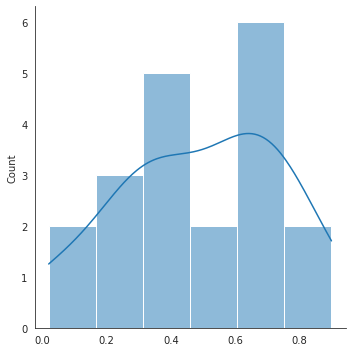

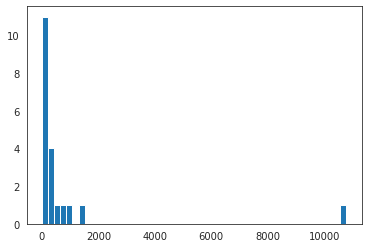

In [ ]:
ed_tags_percentage = []
ed_tagged_posts = []

f = client.posts("forestsgnome")
print("blog name: forestsgnome")
print("total posts: ")
total = f['total_posts']
print((total))
f = client.posts("forestsgnome", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("quashstigma")
print("blog name: quashstigma")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("quashstigma", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("recovering-rachel")
print("blog name: recovering-rachel")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("recovering-rachel", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("bebravebecca")
print("blog name: bebravebecca")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("bebravebecca", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("chiarasolems")
print("blog name: chiarasolems")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("chiarasolems", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("siaia")
print("blog name: siaia")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("siaia", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("heart-of-a-wildflower")
print("blog name: heart-of-a-wildflower")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("heart-of-a-wildflower", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("edrecoveryandflourishing")
print("blog name: edrecoveryandflourishing")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("edrecoveryandflourishing", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("nourishtoflourishyes")
print("blog name: nourishtoflourishyes")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("nourishtoflourishyes", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("want2beless")
print("blog name: want2beless")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("want2beless", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("your-ed-princess")
print("blog name: your-ed-princess")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("your-ed-princess", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("imgoingtobeskinny")
print("blog name: imgoingtobeskinny")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("imgoingtobeskinny", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("recovery-afterrelapse")
print("blog name: recovery-afterrelapse")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("recovery-afterrelapse", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("tobeheldjpg")
print("blog name: tobeheldjpg")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("tobeheldjpg", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("imtrying-butimpissed")
print("blog name: imtrying-butimpissed")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("imtrying-butimpissed", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("e4tyourh3art0ut")
print("blog name: e4tyourh3art0ut")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("e4tyourh3art0ut", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("your-ed-princess")
print("blog name: your-ed-princess")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("your-ed-princess", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("hungryhiipo")
print("blog name: hungryhiipo")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("hungryhiipo", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("verypeachgothskeleton")
print("blog name: verypeachgothskeleton")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("verypeachgothskeleton", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

f = client.posts("self-love-is-fragile")
print("blog name: self-love-is-fragile")
print("total posts: ")
total = f['total_posts']
print(total)
f = client.posts("self-love-is-fragile", type = 'text', tag = ed_tags)
print("ed posts: ")
edtagged = f['total_posts']
ed_tagged_posts.append(edtagged)
print((edtagged))
proportion = round(edtagged / total, 2) 
print("proportion: ", proportion)
ed_tags_percentage.append(proportion)
print()

# f = client.posts("an0rexic-alexis")
# print("blog name: an0rexic-alexis")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("an0rexic-alexis", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("depressedanorexic07")
# print("blog name: depressedanorexic07")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("depressedanorexic07", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("daintyyywristss")
# print("blog name: daintyyywristss")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("daintyyywristss", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("yuichxrry")
# print("blog name: yuichxrry")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("yuichxrry", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("i-just-wanna-lose")
# print("blog name: i-just-wanna-lose")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("i-just-wanna-lose", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("sad-wondering-be-skinny-bitch")
# print("blog name: sad-wondering-be-skinny-bitch")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("sad-wondering-be-skinny-bitch", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("bodygoalsdecomposing")
# print("blog name: bodygoalsdecomposing")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("bodygoalsdecomposing", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("so-you-think-im-skinny224")
# print("blog name: so-you-think-im-skinny224")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("so-you-think-im-skinny224", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("makemeskinnyyyyyy")
# print("blog name: makemeskinnyyyyyy")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("makemeskinnyyyyyy", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()

# f = client.posts("skinnyacademia")
# print("blog name: skinnyacademia")
# print("total posts: ")
# total = f['total_posts']
# print(total)
# f = client.posts("skinnyacademia", type = 'text', tag = ed_tags)
# print("ed posts: ")
# edtagged = f['total_posts']
# print((edtagged))
# proportion = round(edtagged / total, 2) 
# print("proportion: ", proportion)
# ed_tags_percentage.append(proportion)
# print()
# print()

print("total blogs: ", len(ed_tags_percentage))

sns.set_style('white')
sns.displot(ed_tags_percentage, kde = True)
plt.show()

plt.hist(ed_tagged_posts, bins = 50)
plt.show()




FILTERS 

In [ ]:
# Proportion of ED posts
def proportion_ed_tagged_posts(proportion):
  if(proportion >= 0.3):
    return true 


# Number of ED posts 
def number_ed_posts(edtagged):
  if(edtagged >= 100):
    return true 

# Recency - year of earliest post & if we have data from 2020 until now)
def recency(post_dates):
  earliestYear = post_dates[0]
  twentytwenty = false
  twentytwentyone = false
  twentytwentytwo = false
  for date in post_dates:
    if(date == 2020):
      twentytwenty = true
    if(date == 2021):
      twentytwentyone = true
    if(date == 2022):
      twentytwentytwo = true
    if(date < earliestYear):
      earliestYear = date
  if(twentytwenty == false || twentytwentyone == false || twentytwentytwo == false):
    return false;
  return true;

# Time : looking for sudden falls, especially near the current date
def time_bell_plot(post_dates):
  sns.set_style('white')
  sns.displot(post_dates, kde = True)
  plt.show()


Length of posts - distribution plot

In [ ]:
import pytumblr
import json
import matplotlib.pyplot as plt
import seaborn as sns

client = pytumblr.TumblrRestClient(
    'yzIo8N2UuG5WvnaOghl8NgIHRdJdG0A75y3FY8yecfkllB4Vy4',
    'TV0DCkIxS8JhV9fNT4XQZn6G3sp3v1I0942qOeZICgL7nckKcq',
    's0ETGewoFwHkT3zWfRkRAIj5GHBibi5pLhsogNwaQKPH4xpMRK',
    'cf5NFXon2lfTLl5uVS2dSkcesK4ZxVcTl0nTJyPGWdQJvhRx1D'
)
blog_name = []
blog_name.append("forestsgnome.tumblr.com")
blog_name.append("quashstigma.tumblr.com")
blog_name.append("recovering-rachel.tumblr.com")
blog_name.append("bebravebecca.tumblr.com")
blog_name.append("chiarasolems.tumblr.com")
blog_name.append("siaia.tumblr.com")
blog_name.append("heart-of-a-wildflower.tumblr.com")
blog_name.append("edrecoveryandflourishing.tumblr.com")
blog_name.append("nourishtoflourishyes.tumblr.com")
blog_name.append("want2beless.tumblr.com")
blog_name.append("your-ed-princess.tumblr.com")
blog_name.append("imgoingtobeskinny.tumblr.com")

totalPosts = 0
posts = []
offset = 0

#gets all posts from that blog, not just the first 20
def get_all_posts(client, blog_name):
    offset = 0
    while True:
        response = client.posts(blog_name, limit=20, offset=offset)
        posts = response.get("posts", [])
        if not posts: return
        for post in posts:
            yield post
        offset += 20
i = 0
length_all_blogs = [] #contains length of all posts in that blog
list_of_individual_blog_lengths = [] # contains list of list of length of blogs

# runs through all blogs
for blogs in blog_name:
    returnedPosts = get_all_posts(client, blogs)
    posts = returnedPosts # stores all posts from that blog
    postsText = []
    postsURL = []
    for post in posts: # gets text from post depening on post type
        postType = post['type']
        totalPosts += 1
        if postType == 'text':
            postsText.append(post.get("body", ""))
            postsURL.append(post.get("post_url", ""))
        if postType == 'photo':
            postsText.append(post.get("caption", ""))
            postsURL.append(post.get("post_url", ""))
        if postType == 'video':
            postsText.append(post.get("caption", ""))
            postsURL.append(post.get("post_url", ""))
        if postType == 'quote':
            postsText.append(post.get("caption", ""))
            postsURL.append(post.get("post_url", ""))
    length_each_post = []
    for texts in postsText: # gets length of text of each post
        text = texts
        word_list = text.split()
        number_of_words = len(word_list)
        length_each_post.append(number_of_words)
        length_all_blogs.append(number_of_words)
    list_of_individual_blog_lengths.append(length_each_post)
    print(blogs)
    print(len(length_each_post))

# plots distribution of each individual blog
for blogs in list_of_individual_blog_lengths:
    sns.set_style('white')
    sns.displot(blogs, kde = True)
    plt.show()

# plots distribution of all posts
sns.set_style('white')
sns.displot(length_all_blogs, kde = True)
plt.show()

POST DATE HISTOGRAMS 

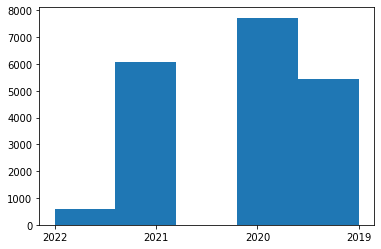

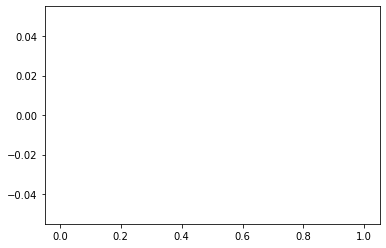

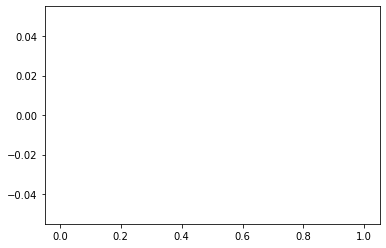

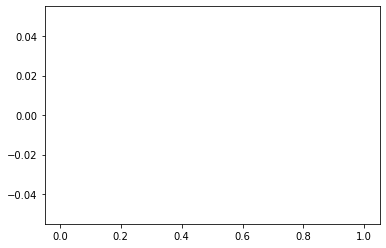

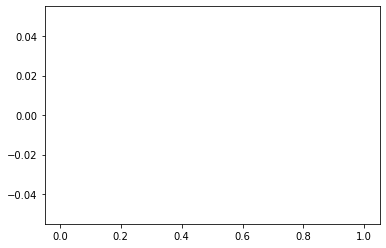

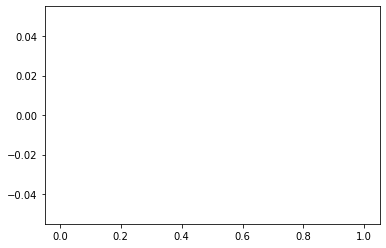

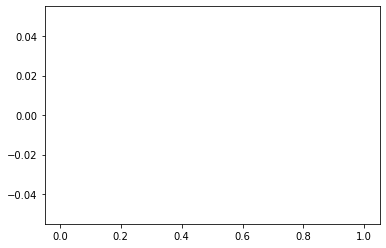

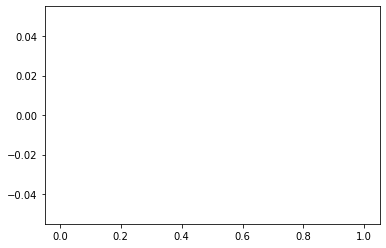

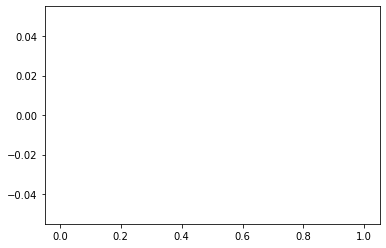

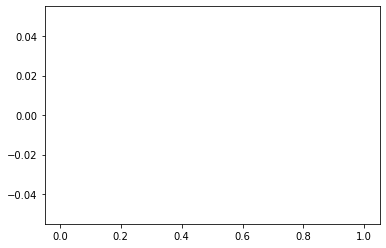

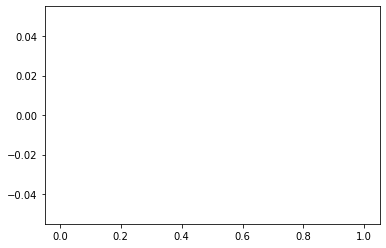

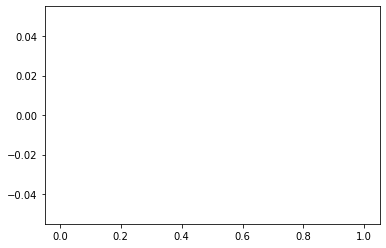

In [ ]:
import pytumblr
import json
import matplotlib.pyplot as plt

client = pytumblr.TumblrRestClient(
    'yzIo8N2UuG5WvnaOghl8NgIHRdJdG0A75y3FY8yecfkllB4Vy4',
    'TV0DCkIxS8JhV9fNT4XQZn6G3sp3v1I0942qOeZICgL7nckKcq',
    's0ETGewoFwHkT3zWfRkRAIj5GHBibi5pLhsogNwaQKPH4xpMRK',
    'cf5NFXon2lfTLl5uVS2dSkcesK4ZxVcTl0nTJyPGWdQJvhRx1D'
)

def get_all_posts(client, blog_name):
    offset = 0
    while True:
        response = client.posts(blog_name, limit=20, offset=offset)
        posts = response.get("posts", [])
        if not posts: return
        for post in posts:
            yield post
        offset += 20

blog_name = []
blog_name.append("forestsgnome.tumblr.com")
blog_name.append("quashstigma.tumblr.com")
blog_name.append("recovering-rachel.tumblr.com")
blog_name.append("bebravebecca.tumblr.com")
blog_name.append("chiarasolems.tumblr.com")
blog_name.append("siaia.tumblr.com")
blog_name.append("heart-of-a-wildflower.tumblr.com")
blog_name.append("edrecoveryandflourishing.tumblr.com")
blog_name.append("nourishtoflourishyes.tumblr.com")
blog_name.append("want2beless.tumblr.com")
blog_name.append("your-ed-princess.tumblr.com")
blog_name.append("imgoingtobeskinny.tumblr.com")

for blog in blog_name:
  returnedPosts = get_all_posts(client, blog)
  posts = returnedPosts
  post_dates = []
  for post in posts:
    date = post.get("date", "")
    year = date[0:4]
    post_dates.append(year)
  plt.hist(post_dates, bins = 5)
  plt.show()
  #recency(post_dates)





# posts = returnedPosts # stores all posts from that blog
# post_dates = []
# for post in posts:
#   date = post.get("date", "")
#   year = date[0:4]
#   post_dates.append(year)

# plt.hist(post_dates, bins = 2)
# plt.show()